In [239]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
df = pd.read_csv("cleaned_fintech_data.csv", usecols = ['clean_text','polarity'])
# above line will be different depending on where you saved your data, and your file name
print(df)

                                             clean_text             polarity
0     Giving forth life becoming burden Kenya This m...   0.3194444444444445
1     Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...                  0.0
2     Rei chintu lo Vachina Ad Nizam ne lo kottaru f...                  0.0
3     Today World Day Combat Restoring degraded land...                 0.25
4     Hearing say 's confident vaccines delivered li...                  0.5
...                                                 ...                  ...
5616  Lambie voted AGAINST Medivac Carbon tax protec...  0.13636363636363635
5617  Idhi bathuku Most Day1 Records In Nizam Non BB...                  0.5
5618  welkin moon giveaway bc finally money -u got t...  0.15416666666666667
5619  Manam edi chesina Daaniki kuda elevation istad...                  0.0
5620  This first time I 've seen Government media le...                 0.13

[5621 rows x 2 columns]


In [240]:
df["polarity"] = df["polarity"].astype(str)
print(df)

                                             clean_text             polarity
0     Giving forth life becoming burden Kenya This m...   0.3194444444444445
1     Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...                  0.0
2     Rei chintu lo Vachina Ad Nizam ne lo kottaru f...                  0.0
3     Today World Day Combat Restoring degraded land...                 0.25
4     Hearing say 's confident vaccines delivered li...                  0.5
...                                                 ...                  ...
5616  Lambie voted AGAINST Medivac Carbon tax protec...  0.13636363636363635
5617  Idhi bathuku Most Day1 Records In Nizam Non BB...                  0.5
5618  welkin moon giveaway bc finally money -u got t...  0.15416666666666667
5619  Manam edi chesina Daaniki kuda elevation istad...                  0.0
5620  This first time I 've seen Government media le...                 0.13

[5621 rows x 2 columns]


In [170]:
df.dtypes

clean_text    object
polarity      object
dtype: object

In [241]:
df["polarity"] = pd.to_numeric(df["polarity"],errors='coerce')

In [242]:
# create a function to define text_category
def text_category(row):
    if row['polarity'] < 0.0:
        return "Negative"
    elif row['polarity'] >0.0:
        return "Positive"
    else:
        return "Neutral"
# apply to dataframe, use axis=1 to apply the function to every row
df['score'] = df.apply(text_category, axis=1)
print(df)


                                             clean_text  polarity     score
0     Giving forth life becoming burden Kenya This m...  0.319444  Positive
1     Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...  0.000000   Neutral
2     Rei chintu lo Vachina Ad Nizam ne lo kottaru f...  0.000000   Neutral
3     Today World Day Combat Restoring degraded land...  0.250000  Positive
4     Hearing say 's confident vaccines delivered li...  0.500000  Positive
...                                                 ...       ...       ...
5616  Lambie voted AGAINST Medivac Carbon tax protec...  0.136364  Positive
5617  Idhi bathuku Most Day1 Records In Nizam Non BB...  0.500000  Positive
5618  welkin moon giveaway bc finally money -u got t...  0.154167  Positive
5619  Manam edi chesina Daaniki kuda elevation istad...  0.000000   Neutral
5620  This first time I 've seen Government media le...  0.130000  Positive

[5621 rows x 3 columns]


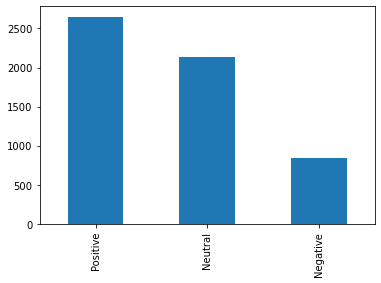

In [164]:
df["score"].value_counts().plot.bar()

plt.show()

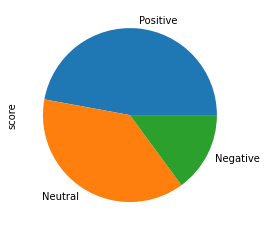

In [163]:
df["score"].value_counts().plot.pie()

plt.show()

In [243]:
# create a function to define score_map
def score_map(row):
    if row['score']=="Neutral":
        return 0
    elif row['score'] =="Positive":
        return 1
    else:
        return 0
# apply to dataframe, use axis=1 to apply the function to every row
df['scoremap'] = df.apply(score_map, axis=1)
print(df)

                                             clean_text  polarity     score  \
0     Giving forth life becoming burden Kenya This m...  0.319444  Positive   
1     Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...  0.000000   Neutral   
2     Rei chintu lo Vachina Ad Nizam ne lo kottaru f...  0.000000   Neutral   
3     Today World Day Combat Restoring degraded land...  0.250000  Positive   
4     Hearing say 's confident vaccines delivered li...  0.500000  Positive   
...                                                 ...       ...       ...   
5616  Lambie voted AGAINST Medivac Carbon tax protec...  0.136364  Positive   
5617  Idhi bathuku Most Day1 Records In Nizam Non BB...  0.500000  Positive   
5618  welkin moon giveaway bc finally money -u got t...  0.154167  Positive   
5619  Manam edi chesina Daaniki kuda elevation istad...  0.000000   Neutral   
5620  This first time I 've seen Government media le...  0.130000  Positive   

      scoremap  
0            1  
1            0  


In [264]:
X = df.drop(['polarity','score','scoremap'],axis=1)
vect = CountVectorizer(analyzer='char', ngram_range=(1,3) )
X = vect.fit_transform(X)
print(X)
X.reshape(-1,1)
X = X.transpose()
print(X)
y = df['scoremap']
print(y)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
caler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
sgdc = SGDClassifier(max_iter=1000, tol=0.01)
sgdc.fit(X_train, y_train)

  (0, 6)	1
  (0, 14)	1
  (0, 9)	2
  (0, 3)	1
  (0, 17)	1
  (0, 0)	1
  (0, 20)	2
  (0, 23)	1
  (0, 7)	1
  (0, 15)	1
  (0, 10)	1
  (0, 4)	1
  (0, 18)	1
  (0, 1)	1
  (0, 21)	1
  (0, 12)	1
  (0, 24)	1
  (0, 8)	1
  (0, 16)	1
  (0, 11)	1
  (0, 5)	1
  (0, 19)	1
  (0, 2)	1
  (0, 22)	1
  (0, 13)	1
  (6, 0)	1
  (14, 0)	1
  (9, 0)	2
  (3, 0)	1
  (17, 0)	1
  (0, 0)	1
  (20, 0)	2
  (23, 0)	1
  (7, 0)	1
  (15, 0)	1
  (10, 0)	1
  (4, 0)	1
  (18, 0)	1
  (1, 0)	1
  (21, 0)	1
  (12, 0)	1
  (24, 0)	1
  (8, 0)	1
  (16, 0)	1
  (11, 0)	1
  (5, 0)	1
  (19, 0)	1
  (2, 0)	1
  (22, 0)	1
  (13, 0)	1
0       1
1       0
2       0
3       1
4       1
       ..
5616    1
5617    1
5618    1
5619    0
5620    1
Name: scoremap, Length: 5621, dtype: int64
(5621,)


ValueError: Found input variables with inconsistent numbers of samples: [25, 5621]